In [1]:
from tqdm import tqdm
import os
from glob import glob

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = "Keep"

def to_keep(ID):
    first = ID[0] in {"A", "T"}
    try:
        int(ID[1])
        return first
    except ValueError:
        return False

def parse_middle(row):
    if row.name[1].startswith("T"):
        ent_type, span = row.middle.split(" ", 1)
        return {"entity_type": ent_type, "span": span}
    else:
        keys = ["attr_type", "attr_ref", "attr_val"]
        return dict(zip(keys, str(row.middle).split()))

def df_from_ann_file(f):
    df = pd.read_csv(f, sep="\t", header=None, 
                         names=["ID", "middle", "entity_name"])
    df = df[df.ID.apply(to_keep)]
    df["file"] = f
    df = df.set_index(["file", "ID"])
    mdf = pd.DataFrame.from_records(df.apply(parse_middle, axis="columns")).set_index(df.index)

    return df.join(mdf).drop("middle", axis=1)
#     return pd.concat([df, mdf], axis=1)


def filter_df(df):
    to_drop = df.entity_type.isin({"Noteworthy", "DuplicatePage", "TranscriptionError_Document"})
    
    try:
        to_drop = to_drop | df.attr_type.isin({"Notary"})
    except AttributeError:
        pass    
    return df[~to_drop]

In [3]:
done = set()

dfs = []
pbar = tqdm(set(glob(f"{data_dir}/*/*.ann")))
for f in pbar:
    pbar.set_description(f)
    file = f.split("/")[-1]
    if file in done:
        continue
    done.add(file)    
    df = df_from_ann_file(f)
    
    dfs.append(df)

Keep/B/NL-HaNA_1.04.02_6857_0089.ann: 100%|█| 2490/2490 [00:20<00:00, 122.11it/s


In [4]:
big = pd.concat(dfs)
big = filter_df(big)

In [5]:
# Organisation needs attr Beneficiary
    
def is_bad_org(t, sub_df):
    atts = sub_df[sub_df.attr_ref == t]
    return atts[atts.attr_type == "Beneficiary"].shape[0] == 0

ls = []
for file, sub in tqdm(big.groupby(level=0)):    
    orgs = sub[sub.entity_type == "Organization"]
    for (file2, row_id), r in orgs.iterrows():
        bad  = is_bad_org(row_id, sub)
        if bad:
            sub = sub.drop((file2, row_id))
        else:
            print(file, sub.shape)
        
    ls.append(sub)
new_big = pd.concat(ls)

  8%|███                                    | 171/2148 [00:00<00:06, 302.10it/s]

Keep/A/NL-HaNA_1.04.02_6860_0200.ann (15, 6)
Keep/A/NL-HaNA_1.04.02_6860_0200.ann (14, 6)
Keep/A/NL-HaNA_1.04.02_6860_0218.ann (33, 6)
Keep/A/NL-HaNA_1.04.02_6863_0125.ann (72, 6)
Keep/A/NL-HaNA_1.04.02_6863_0127.ann (84, 6)
Keep/A/NL-HaNA_1.04.02_6869_0159.ann (53, 6)
Keep/A/NL-HaNA_1.04.02_6870_0107.ann (49, 6)
Keep/A/NL-HaNA_1.04.02_6870_0116.ann (13, 6)
Keep/A/NL-HaNA_1.04.02_6870_0129.ann (41, 6)
Keep/A/NL-HaNA_1.04.02_6870_0132.ann (49, 6)
Keep/A/NL-HaNA_1.04.02_6870_0134.ann (49, 6)


 14%|█████▌                                 | 307/2148 [00:00<00:04, 392.52it/s]

Keep/A/NL-HaNA_1.04.02_6870_0175.ann (35, 6)
Keep/A/NL-HaNA_1.04.02_6870_0183.ann (62, 6)
Keep/A/NL-HaNA_1.04.02_6870_0205.ann (37, 6)
Keep/A/NL-HaNA_1.04.02_6870_0501.ann (59, 6)
Keep/A/NL-HaNA_1.04.02_6870_0506.ann (25, 6)
Keep/A/NL-HaNA_1.04.02_6870_0506.ann (25, 6)


 24%|█████████▎                             | 514/2148 [00:01<00:03, 462.18it/s]

Keep/B/NL-HaNA_1.04.02_6860_0379.ann (54, 6)
Keep/B/NL-HaNA_1.04.02_6860_0379.ann (54, 6)
Keep/B/NL-HaNA_1.04.02_6860_0381.ann (38, 6)
Keep/B/NL-HaNA_1.04.02_6860_0383.ann (85, 6)
Keep/B/NL-HaNA_1.04.02_6860_0383.ann (84, 6)
Keep/B/NL-HaNA_1.04.02_6860_0383.ann (84, 6)
Keep/B/NL-HaNA_1.04.02_6860_0384.ann (47, 6)
Keep/B/NL-HaNA_1.04.02_6860_0384.ann (47, 6)
Keep/B/NL-HaNA_1.04.02_6860_0384.ann (45, 6)
Keep/B/NL-HaNA_1.04.02_6860_0385.ann (37, 6)
Keep/B/NL-HaNA_1.04.02_6860_0386.ann (30, 6)
Keep/B/NL-HaNA_1.04.02_6860_0387.ann (46, 6)
Keep/B/NL-HaNA_1.04.02_6860_0388.ann (23, 6)
Keep/B/NL-HaNA_1.04.02_6860_0388.ann (23, 6)
Keep/B/NL-HaNA_1.04.02_6860_0390.ann (8, 6)
Keep/B/NL-HaNA_1.04.02_6860_0392.ann (32, 6)
Keep/B/NL-HaNA_1.04.02_6860_0392.ann (32, 6)
Keep/B/NL-HaNA_1.04.02_6860_0394.ann (41, 6)
Keep/B/NL-HaNA_1.04.02_6860_0395.ann (29, 6)
Keep/B/NL-HaNA_1.04.02_6863_0210.ann (29, 6)
Keep/B/NL-HaNA_1.04.02_6863_0216.ann (26, 6)
Keep/B/NL-HaNA_1.04.02_6863_0222.ann (73, 6)
Keep/B/NL-H

 28%|███████████                            | 607/2148 [00:01<00:03, 426.13it/s]

Keep/C/NL-HaNA_1.04.02_6848_0118.ann (9, 6)
Keep/C/NL-HaNA_1.04.02_6848_0121.ann (35, 6)
Keep/C/NL-HaNA_1.04.02_6848_0122.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6848_0123.ann (4, 6)
Keep/C/NL-HaNA_1.04.02_6848_0124.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6848_0124.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6848_0124.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6848_0124.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6848_0125.ann (20, 6)
Keep/C/NL-HaNA_1.04.02_6848_0126.ann (10, 6)
Keep/C/NL-HaNA_1.04.02_6848_0126.ann (10, 6)
Keep/C/NL-HaNA_1.04.02_6848_0126.ann (10, 6)
Keep/C/NL-HaNA_1.04.02_6848_0126.ann (10, 6)
Keep/C/NL-HaNA_1.04.02_6848_0127.ann (12, 6)
Keep/C/NL-HaNA_1.04.02_6848_0128.ann (66, 6)
Keep/C/NL-HaNA_1.04.02_6848_0128.ann (66, 6)
Keep/C/NL-HaNA_1.04.02_6848_0129.ann (13, 6)
Keep/C/NL-HaNA_1.04.02_6848_0129.ann (13, 6)
Keep/C/NL-HaNA_1.04.02_6848_0129.ann (13, 6)
Keep/C/NL-HaNA_1.04.02_6848_0130.ann (48, 6)
Keep/C/NL-HaNA_1.04.02_6848_0131.ann (24, 6)
Keep/C/NL-HaNA_1.04.02_6848_0132.ann (44, 6)
Keep/C/NL-Ha

 36%|██████████████▏                        | 780/2148 [00:01<00:02, 624.44it/s]

 (14, 6)
Keep/C/NL-HaNA_1.04.02_6860_0437.ann (44, 6)
Keep/C/NL-HaNA_1.04.02_6860_0437.ann (44, 6)
Keep/C/NL-HaNA_1.04.02_6860_0439.ann (53, 6)
Keep/C/NL-HaNA_1.04.02_6860_0442.ann (59, 6)
Keep/C/NL-HaNA_1.04.02_6860_0451.ann (34, 6)
Keep/C/NL-HaNA_1.04.02_6860_0452.ann (22, 6)
Keep/C/NL-HaNA_1.04.02_6860_0457.ann (20, 6)
Keep/C/NL-HaNA_1.04.02_6860_0458.ann (25, 6)
Keep/C/NL-HaNA_1.04.02_6860_0460.ann (32, 6)
Keep/C/NL-HaNA_1.04.02_6860_0461.ann (17, 6)
Keep/C/NL-HaNA_1.04.02_6860_0464.ann (26, 6)
Keep/C/NL-HaNA_1.04.02_6860_0465.ann (38, 6)
Keep/C/NL-HaNA_1.04.02_6860_0469.ann (18, 6)
Keep/C/NL-HaNA_1.04.02_6860_0469.ann (18, 6)
Keep/C/NL-HaNA_1.04.02_6860_0475.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6860_0475.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6860_0477.ann (13, 6)
Keep/C/NL-HaNA_1.04.02_6860_0477.ann (13, 6)
Keep/C/NL-HaNA_1.04.02_6860_0479.ann (33, 6)
Keep/C/NL-HaNA_1.04.02_6860_0483.ann (90, 6)
Keep/C/NL-HaNA_1.04.02_6860_0483.ann (90, 6)
Keep/C/NL-HaNA_1.04.02_6860_0483.ann (90, 6)
K

 42%|████████████████▍                      | 908/2148 [00:02<00:02, 605.18it/s]

 (39, 6)
Keep/C/NL-HaNA_1.04.02_6869_0137.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6869_0138.ann (39, 6)
Keep/C/NL-HaNA_1.04.02_6869_0141.ann (33, 6)
Keep/C/NL-HaNA_1.04.02_6869_0142.ann (23, 6)
Keep/C/NL-HaNA_1.04.02_6869_0142.ann (23, 6)
Keep/C/NL-HaNA_1.04.02_6869_0142.ann (23, 6)
Keep/C/NL-HaNA_1.04.02_6869_0149.ann (49, 6)
Keep/C/NL-HaNA_1.04.02_6869_0151.ann (36, 6)
Keep/C/NL-HaNA_1.04.02_6869_0151.ann (36, 6)
Keep/C/NL-HaNA_1.04.02_6869_0155.ann (63, 6)
Keep/C/NL-HaNA_1.04.02_6869_0155.ann (63, 6)
Keep/C/NL-HaNA_1.04.02_6869_0155.ann (63, 6)
Keep/C/NL-HaNA_1.04.02_6869_0156.ann (34, 6)
Keep/C/NL-HaNA_1.04.02_6870_0202.ann (38, 6)
Keep/C/NL-HaNA_1.04.02_6870_0202.ann (38, 6)
Keep/C/NL-HaNA_1.04.02_6870_0209.ann (33, 6)
Keep/C/NL-HaNA_1.04.02_6870_0209.ann (33, 6)
Keep/C/NL-HaNA_1.04.02_6870_0209.ann (33, 6)
Keep/C/NL-HaNA_1.04.02_6870_0301.ann (26, 6)
Keep/C/NL-HaNA_1.04.02_6870_0303.ann (33, 6)
Keep/C/NL-HaNA_1.04.02_6870_0303.ann (33, 6)
Keep/C/NL-HaNA_1.04.02_6870_0304.ann (2, 6)
Ke

 49%|██████████████████▍                   | 1045/2148 [00:02<00:01, 630.33it/s]

 (22, 6)
Keep/C/NL-HaNA_1.04.02_6878_0100.ann (4, 6)
Keep/C/NL-HaNA_1.04.02_6878_0101.ann (54, 6)
Keep/C/NL-HaNA_1.04.02_6878_0103.ann (27, 6)
Keep/C/NL-HaNA_1.04.02_6878_0103.ann (27, 6)
Keep/C/NL-HaNA_1.04.02_6878_0103.ann (27, 6)
Keep/C/NL-HaNA_1.04.02_6878_0104.ann (18, 6)
Keep/C/NL-HaNA_1.04.02_6878_0104.ann (18, 6)
Keep/C/NL-HaNA_1.04.02_6878_0104.ann (18, 6)
Keep/C/NL-HaNA_1.04.02_6878_0151.ann (7, 6)
Keep/C/NL-HaNA_1.04.02_6878_0151.ann (7, 6)
Keep/C/NL-HaNA_1.04.02_6878_0152.ann (64, 6)
Keep/C/NL-HaNA_1.04.02_6878_0152.ann (64, 6)
Keep/C/NL-HaNA_1.04.02_6878_0157.ann (68, 6)
Keep/C/NL-HaNA_1.04.02_6878_0157.ann (68, 6)
Keep/C/NL-HaNA_1.04.02_6878_0158.ann (26, 6)
Keep/C/NL-HaNA_1.04.02_6878_0158.ann (26, 6)
Keep/C/NL-HaNA_1.04.02_6878_0160.ann (54, 6)
Keep/C/NL-HaNA_1.04.02_6878_0162.ann (41, 6)
Keep/C/NL-HaNA_1.04.02_6878_0162.ann (41, 6)
Keep/C/NL-HaNA_1.04.02_6878_0162.ann (41, 6)
Keep/C/NL-HaNA_1.04.02_6878_0165.ann (56, 6)
Keep/C/NL-HaNA_1.04.02_6878_0165.ann (56, 6)
Keep

 52%|███████████████████▌                  | 1109/2148 [00:02<00:01, 603.92it/s]

 (63, 6)
Keep/C/NL-HaNA_1.04.02_6891_0348.ann (17, 6)
Keep/C/NL-HaNA_1.04.02_6891_0350.ann (38, 6)
Keep/C/NL-HaNA_1.04.02_6891_0351.ann (23, 6)
Keep/C/NL-HaNA_1.04.02_6891_0357.ann (49, 6)
Keep/C/NL-HaNA_1.04.02_6891_0358.ann (55, 6)
Keep/C/NL-HaNA_1.04.02_6891_0359.ann (45, 6)
Keep/C/NL-HaNA_1.04.02_6891_0359.ann (45, 6)
Keep/C/NL-HaNA_1.04.02_6891_0359.ann (45, 6)
Keep/C/NL-HaNA_1.04.02_6891_0360.ann (32, 6)
Keep/C/NL-HaNA_1.04.02_6891_0361.ann (21, 6)
Keep/C/NL-HaNA_1.04.02_6891_0361.ann (21, 6)
Keep/C/NL-HaNA_1.04.02_6891_0363.ann (84, 6)
Keep/C/NL-HaNA_1.04.02_6891_0363.ann (84, 6)
Keep/C/NL-HaNA_1.04.02_6891_0371.ann (46, 6)
Keep/C/NL-HaNA_1.04.02_6891_0371.ann (46, 6)
Keep/C/NL-HaNA_1.04.02_6891_0371.ann (46, 6)
Keep/C/NL-HaNA_1.04.02_6891_0371.ann (46, 6)
Keep/C/NL-HaNA_1.04.02_6891_0373.ann (40, 6)
Keep/C/NL-HaNA_1.04.02_6891_0373.ann (40, 6)
Keep/C/NL-HaNA_1.04.02_6891_0373.ann (40, 6)
Keep/C/NL-HaNA_1.04.02_6891_0373.ann (40, 6)
Keep/C/NL-HaNA_1.04.02_6891_0374.ann (18, 6)
K

 57%|█████████████████████▋                | 1228/2148 [00:02<00:01, 539.39it/s]

 (47, 6)
Keep/D/NL-HaNA_1.04.02_6848_0039.ann (55, 6)
Keep/D/NL-HaNA_1.04.02_6848_0039.ann (55, 6)
Keep/D/NL-HaNA_1.04.02_6848_0041.ann (37, 6)
Keep/D/NL-HaNA_1.04.02_6848_0041.ann (37, 6)
Keep/D/NL-HaNA_1.04.02_6848_0043.ann (39, 6)
Keep/D/NL-HaNA_1.04.02_6848_0043.ann (39, 6)
Keep/D/NL-HaNA_1.04.02_6848_0044.ann (16, 6)
Keep/D/NL-HaNA_1.04.02_6848_0044.ann (16, 6)
Keep/D/NL-HaNA_1.04.02_6848_0044.ann (16, 6)
Keep/D/NL-HaNA_1.04.02_6848_0045.ann (54, 6)
Keep/D/NL-HaNA_1.04.02_6848_0045.ann (54, 6)
Keep/D/NL-HaNA_1.04.02_6848_0046.ann (23, 6)
Keep/D/NL-HaNA_1.04.02_6848_0046.ann (23, 6)
Keep/D/NL-HaNA_1.04.02_6848_0046.ann (23, 6)
Keep/D/NL-HaNA_1.04.02_6848_0047.ann (58, 6)
Keep/D/NL-HaNA_1.04.02_6848_0047.ann (58, 6)
Keep/D/NL-HaNA_1.04.02_6848_0047.ann (58, 6)
Keep/D/NL-HaNA_1.04.02_6848_0049.ann (38, 6)
Keep/D/NL-HaNA_1.04.02_6848_0049.ann (38, 6)
Keep/D/NL-HaNA_1.04.02_6848_0049.ann (38, 6)
Keep/D/NL-HaNA_1.04.02_6848_0050.ann (59, 6)
Keep/D/NL-HaNA_1.04.02_6848_0050.ann (59, 6)
K

 65%|████████████████████████▋             | 1394/2148 [00:02<00:01, 673.99it/s]

 (16, 6)
Keep/D/NL-HaNA_1.04.02_6860_0066.ann (18, 6)
Keep/D/NL-HaNA_1.04.02_6860_0066.ann (18, 6)
Keep/D/NL-HaNA_1.04.02_6860_0071.ann (37, 6)
Keep/D/NL-HaNA_1.04.02_6860_0073.ann (28, 6)
Keep/D/NL-HaNA_1.04.02_6860_0073.ann (28, 6)
Keep/D/NL-HaNA_1.04.02_6860_0073.ann (28, 6)
Keep/D/NL-HaNA_1.04.02_6860_0073.ann (28, 6)
Keep/D/NL-HaNA_1.04.02_6860_0075.ann (26, 6)
Keep/D/NL-HaNA_1.04.02_6860_0076.ann (27, 6)
Keep/D/NL-HaNA_1.04.02_6860_0077.ann (23, 6)
Keep/D/NL-HaNA_1.04.02_6860_0079.ann (25, 6)
Keep/D/NL-HaNA_1.04.02_6860_0081.ann (51, 6)
Keep/D/NL-HaNA_1.04.02_6860_0083.ann (33, 6)
Keep/D/NL-HaNA_1.04.02_6860_0084.ann (28, 6)
Keep/D/NL-HaNA_1.04.02_6860_0085.ann (39, 6)
Keep/D/NL-HaNA_1.04.02_6860_0085.ann (39, 6)
Keep/D/NL-HaNA_1.04.02_6860_0093.ann (49, 6)
Keep/D/NL-HaNA_1.04.02_6860_0098.ann (47, 6)
Keep/D/NL-HaNA_1.04.02_6860_0099.ann (30, 6)
Keep/D/NL-HaNA_1.04.02_6860_0105.ann (97, 6)
Keep/D/NL-HaNA_1.04.02_6860_0109.ann (64, 6)
Keep/D/NL-HaNA_1.04.02_6860_0109.ann (64, 6)
K

 72%|███████████████████████████▍          | 1548/2148 [00:03<00:00, 687.78it/s]

Keep/D/NL-HaNA_1.04.02_6869_0238.ann (58, 6)
Keep/D/NL-HaNA_1.04.02_6869_0238.ann (58, 6)
Keep/D/NL-HaNA_1.04.02_6870_0101.ann (36, 6)
Keep/D/NL-HaNA_1.04.02_6870_0101.ann (36, 6)
Keep/D/NL-HaNA_1.04.02_6870_0207.ann (20, 6)
Keep/D/NL-HaNA_1.04.02_6870_0211.ann (28, 6)
Keep/D/NL-HaNA_1.04.02_6870_0211.ann (28, 6)
Keep/D/NL-HaNA_1.04.02_6870_0211.ann (28, 6)
Keep/D/NL-HaNA_1.04.02_6870_0213.ann (26, 6)
Keep/D/NL-HaNA_1.04.02_6870_0213.ann (26, 6)
Keep/D/NL-HaNA_1.04.02_6870_0215.ann (51, 6)
Keep/D/NL-HaNA_1.04.02_6870_0215.ann (51, 6)
Keep/D/NL-HaNA_1.04.02_6870_0215.ann (51, 6)
Keep/D/NL-HaNA_1.04.02_6870_0218.ann (55, 6)
Keep/D/NL-HaNA_1.04.02_6870_0220.ann (50, 6)
Keep/D/NL-HaNA_1.04.02_6870_0221.ann (19, 6)
Keep/D/NL-HaNA_1.04.02_6870_0223.ann (20, 6)
Keep/D/NL-HaNA_1.04.02_6870_0225.ann (20, 6)
Keep/D/NL-HaNA_1.04.02_6870_0228.ann (5, 6)
Keep/D/NL-HaNA_1.04.02_6870_0234.ann (12, 6)
Keep/D/NL-HaNA_1.04.02_6870_0237.ann (12, 6)
Keep/D/NL-HaNA_1.04.02_6870_0239.ann (15, 6)
Keep/D/NL-H

 75%|████████████████████████████▋         | 1619/2148 [00:03<00:00, 614.94it/s]

 (114, 6)
Keep/D/NL-HaNA_1.04.02_6883_0039.ann (81, 6)
Keep/D/NL-HaNA_1.04.02_6883_0039.ann (81, 6)
Keep/D/NL-HaNA_1.04.02_6883_0039.ann (81, 6)
Keep/D/NL-HaNA_1.04.02_6883_0040.ann (82, 6)
Keep/D/NL-HaNA_1.04.02_6883_0040.ann (82, 6)
Keep/D/NL-HaNA_1.04.02_6883_0040.ann (82, 6)
Keep/D/NL-HaNA_1.04.02_6883_0040.ann (82, 6)
Keep/D/NL-HaNA_1.04.02_6883_0041.ann (90, 6)
Keep/D/NL-HaNA_1.04.02_6883_0042.ann (150, 6)
Keep/D/NL-HaNA_1.04.02_6883_0042.ann (150, 6)
Keep/D/NL-HaNA_1.04.02_6883_0043.ann (116, 6)
Keep/D/NL-HaNA_1.04.02_6883_0043.ann (116, 6)
Keep/D/NL-HaNA_1.04.02_6883_0043.ann (116, 6)
Keep/D/NL-HaNA_1.04.02_6883_0043.ann (116, 6)
Keep/D/NL-HaNA_1.04.02_6883_0043.ann (116, 6)
Keep/D/NL-HaNA_1.04.02_6883_0043.ann (116, 6)
Keep/D/NL-HaNA_1.04.02_6883_0044.ann (57, 6)
Keep/D/NL-HaNA_1.04.02_6883_0044.ann (57, 6)
Keep/D/NL-HaNA_1.04.02_6883_0044.ann (57, 6)
Keep/D/NL-HaNA_1.04.02_6883_0045.ann (87, 6)
Keep/D/NL-HaNA_1.04.02_6883_0045.ann (87, 6)
Keep/D/NL-HaNA_1.04.02_6883_0045.ann 

100%|█████████████████████████████████████▊| 2139/2148 [00:04<00:00, 395.51it/s]

Keep/E/NL-HaNA_1.04.02_6891_0238.ann (14, 6)


100%|██████████████████████████████████████| 2148/2148 [00:04<00:00, 477.72it/s]


In [6]:
# Person needs Role AND LegalStatus AND Gender
    
def is_bad_pers(t, sub_df):
    atts = sub_df[sub_df.attr_ref == t]
    return (atts[atts.attr_type == "Gender"].shape[0] == 0 or
            atts[atts.attr_type == "Role"].shape[0] == 0 or
            atts[atts.attr_type == "LegalStatus"].shape[0] == 0)

ls = []
for file, sub in tqdm(new_big.groupby(level=0)):    
    pers = sub[sub.entity_type == "Person"]
    for (file2, row_id), r in pers.iterrows():
        bad  = is_bad_pers(row_id, sub)
        if bad:
            sub = sub.drop((file2, row_id))
            
            have_this_id = sub[sub.attr_ref == row_id]
            sub = sub.drop(have_this_id.index)
        else:
            pass
#             print(file, sub.shape)
        
    ls.append(sub)
new_big = pd.concat(ls)

100%|██████████████████████████████████████| 2142/2142 [00:14<00:00, 145.34it/s]


In [7]:
big = new_big

In [8]:
def barplot(x, y, rotation=0):
    plt.figure(figsize=(8, 8))
    plt.bar(x, y)
    # plt.plot(x, y, ".", )
    for cur_x, cur_y in zip(x, y): plt.annotate(round(cur_y, 3), (cur_x, cur_y+0.01))
    _ = plt.xticks(x, y.index, rotation=rotation)
    plt.ylim((0, 1))
    plt.show()

In [9]:
print(f"1. # unique pages annotated:\t{len(done)}")

1. # unique pages annotated:	2183


In [10]:
print(f"3.1 # of annotations (= # rows in table):\t{big.shape[0]}")
n = big[big.index.get_level_values(1).str.startswith("T")].shape[0]
print(f"3.1 # of entity annotations (= # rows in table starting with 'T'):\t{n}")
print(f"3.1 # of attribute annotations\t{big.shape[0] - n}")

3.1 # of annotations (= # rows in table):	68461
3.1 # of entity annotations (= # rows in table starting with 'T'):	32232
3.1 # of attribute annotations	36229


In [11]:
# print(f"# spans:\t{(~big.span.isna()).sum()}")

print(f"3.2 # tokens(!) in entity names:\t{big.entity_name.fillna('').str.split().apply(len).sum()}")

3.2 # tokens(!) in entity names:	79518



3.3 NUMBER OF ENTITIES PER TYPE
entity_type
Organization     1110
Person          11706
Place            4508
ProperName      14908
dtype: int64

3.3 PERCENTAGE OF ENTITIES OF TYPE
entity_type
Organization    0.034438
Person          0.363179
Place           0.139861
ProperName      0.462522
dtype: float64


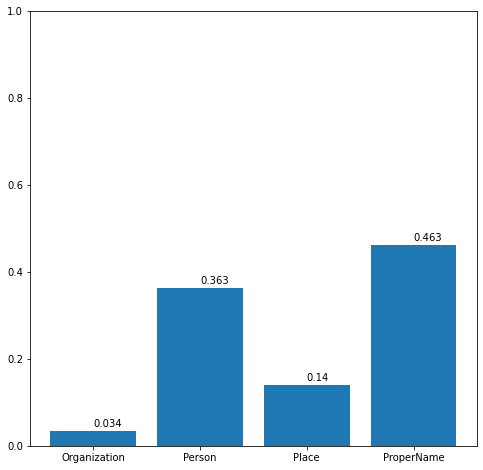


3.4 NUMBER OF TOKENS PER ENTITY TYPE
entity_type
Organization     4728
Person          32423
Place           10059
ProperName      32308
dtype: int64

3.4 AVERAGE NUMBER OF TOKENS OF EACH ENTITY PER ENTITY TYPE
entity_type
Organization    4.259459
Person          2.769776
Place           2.231366
ProperName      2.167159
dtype: float64


In [12]:
ns = big.groupby("entity_type").apply(lambda sub: (~sub.span.isna()).sum())

print("\n3.3 number of entities per type".upper())
print(ns)
print()
# print(big.groupby("entity_type").apply(lambda sub: (~sub.span.isna()).sum())/sub.shape[0])
print("3.3 percentage of entities of type".upper())
print((ns/ns.sum()))

# x, y = [1,2,3, 4], (ns/ns.sum())
# plt.figure(figsize=(8, 8))
# plt.bar(x, y)
# # plt.plot(x, y, ".", )
# for cur_x, cur_y in zip(x, y): plt.annotate(round(cur_y, 3), (cur_x, cur_y+0.01))
# _ = plt.xticks(x, y.index)
# plt.ylim((0, 1))
# plt.show()

barplot([1,2,3, 4], (ns/ns.sum()))



ns_toks = big.groupby("entity_type").apply(lambda sub:
                                     sub.entity_name.fillna('').str.split().apply(len).sum())

print("\n3.4 number of tokens per entity type".upper())
print(ns_toks)
print("\n3.4 average number of tokens of each entity per entity type".upper())
print(ns_toks/ns)

4. BENEFICIARY
No     948
Yes    163
Name: attr_val, dtype: int64

No     0.853285
Yes    0.146715
Name: attr_val, dtype: float64


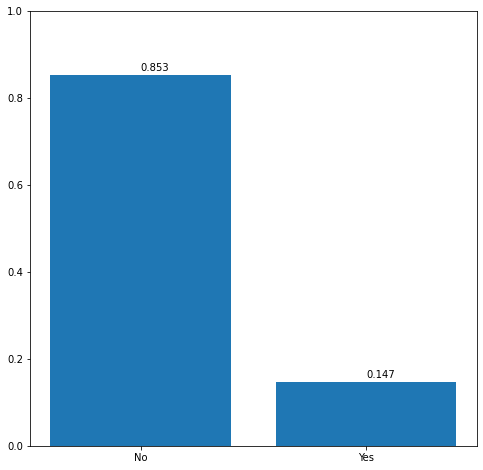


4. GENDER
Unspecified    5806
Man            4242
Woman          1237
Group           421
Name: attr_val, dtype: int64

Unspecified    0.495985
Man            0.362378
Woman          0.105672
Group          0.035964
Name: attr_val, dtype: float64


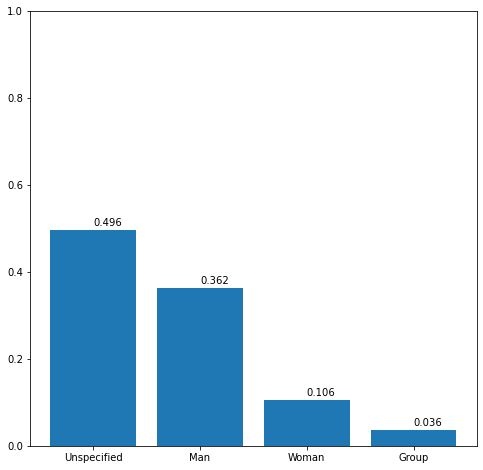


4. LEGALSTATUS
Unspecified    10672
Enslaved         882
Freed            152
Name: attr_val, dtype: int64

Unspecified    0.911669
Enslaved       0.075346
Freed          0.012985
Name: attr_val, dtype: float64


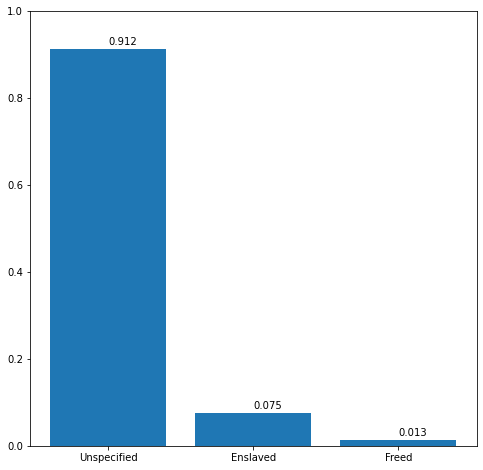


4. ROLE
Other                   5916
Beneficiary             1821
Testator                1294
Witness                 1127
Acting_Notary            805
Notary                   469
Testator_Beneficiary     274
Name: attr_val, dtype: int64

Other                   0.505382
Beneficiary             0.155561
Testator                0.110542
Witness                 0.096275
Acting_Notary           0.068768
Notary                  0.040065
Testator_Beneficiary    0.023407
Name: attr_val, dtype: float64


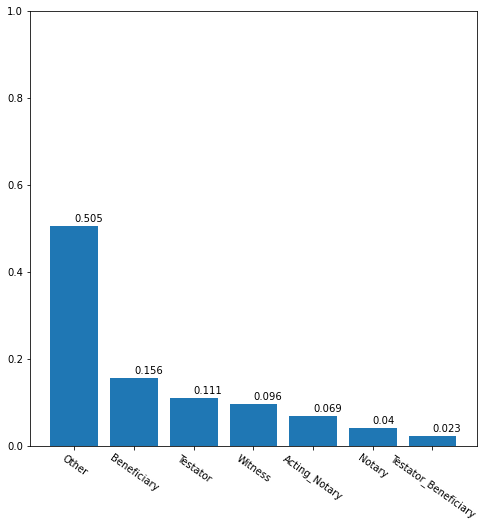

In [13]:
for at, sub in big.groupby("attr_type"):
    print(f"4. {at.upper()}")
    cs = sub.attr_val.value_counts()
    print(cs)
    print()
    print(cs/cs.sum())
    
    barplot(list(range(1, cs.shape[0]+1)),
           cs/cs.sum(), rotation=(360-35 if cs.shape[0] > 6 else 0))
    
    print()
#     sub.attr_val.hist(bins=20)
#     plt.title(at)
#     plt.show()


# big[big.attr_type == "Role"].attr_val.value_counts()